In [15]:
from matplotlib import pyplot
from descartes import PolygonPatch

import folium
import pandas as pd
import geopandas as gpd
import branca

county_geo = '../Shapefile_Playground/us_counties_20m_topo.json'

In [189]:
predictions = pd.read_csv('final_model_predictions-Copy1.csv').set_index('GEOID')

In [190]:
predictions

0         1
GEOID                    
15003  0.069753  0.930247
45013  0.456515  0.543485
33015  0.011282  0.988718
26081  0.006488  0.993512
25017  0.010057  0.989943
8014   0.695627  0.304373
39061  0.006418  0.993582
37135  0.260989  0.739011
24510  0.022799  0.977201
8031   0.005615  0.994385
48453  0.007678  0.992322
6073   0.005496  0.994504
6055   0.270499  0.729501
4013   0.004759  0.995241
13215  0.394552  0.605448
37021  0.011681  0.988319
49035  0.013376  0.986624
17031  0.007357  0.992643
48201  0.008394  0.991606
26165  0.630737  0.369263
51003  0.532623  0.467377
8059   0.005056  0.994944
37063  0.064047  0.935953
53011  0.006758  0.993242
42029  0.033567  0.966433
4005   0.403517  0.596483
48491  0.081534  0.918466
38015  0.746425  0.253575
53035  0.019364  0.980636
35001  0.008571  0.991429
...         ...       ...
49017  0.859532  0.140468
8057   0.821184  0.178816
49019  0.849372  0.150628
49021  0.724321  0.275679
8061   0.843782  0.156218
49023  0.856570  0.143430
8063   0.889661  0.110339
49025  0.844250  0.155750
49027  0.856113  0.143887
49029  0.750007  0.249993
49031  0.740159  0.259841
8073   0.866352  0.133648
49033  0.849075  0.150925
49037  0.667604  0.332396
8079   0.817614  0.182386
49039  0.754068  0.245932
8081   0.854137  0.145863
49041  0.740156  0.259844
49045  0.680000  0.320000
8087   0.844548  0.155452
8089   0.774944  0.225056
49051  0.759993  0.240007
49053  0.556774  0.443226
8095   0.897985  0.102015
49055  0.807009  0.192991
8099   0.731279  0.268721
8103   0.852309  0.147691
8109   0.795775  0.204225
8115   0.824961  0.175039
8121   0.865409  0.134591

[3140 rows x 2 columns]

# All predictions

In [380]:
import math

colorscale = branca.colormap.LinearColormap(colors=['blue','white', 'red'], index=[0,.5,1],vmin=0,vmax=1)
brew_series = predictions['1']
brew_series_nonzero = brew_series[brew_series != 0]


def style_function(feature):
    brews = brew_series_nonzero.get(int(feature['id'][-5:]))
    return {
        'fillOpacity': 0.7,
        'weight': 0,
        'fillColor': 'None' if brews is None else colorscale(brews)
    }


m = folium.Map(
    location=[48, -102],
    tiles='cartodbpositron',
    zoom_start=3
)

folium.TopoJson(
    open(county_geo),
    'objects.us_counties_20m',
    style_function=style_function
).add_to(m)

m.save(outfile='All_Predictions.html')
m

In [381]:
colorscale

# High Confidence Predictions

In [22]:
brew_series = predictions.set_index('GEOID')['1']
brew_series = brew_series[brew_series.values>0.8]

In [27]:
import math

colorscale = branca.colormap.LinearColormap(colors=['white', 'red'], index=[0.8,1],vmin=0,vmax=1)
brew_series = predictions.set_index('GEOID')['1']
brew_series = brew_series[brew_series.values>0.9]
brew_series_nonzero = brew_series[brew_series != 0]


def style_function(feature):
    brews = brew_series_nonzero.get(int(feature['id'][-5:]))
    return {
        'fillOpacity': 0.7,
        'weight': 0,
        'fillColor': 'None' if brews is None else colorscale(brews)
    }


m = folium.Map(
    location=[48, -102],
    tiles='cartodbpositron',
    zoom_start=3
)

folium.TopoJson(
    open(county_geo),
    'objects.us_counties_20m',
    style_function=style_function
).add_to(m)

m.save(outfile='existing_breweries_counts.html')
m

# Existing breweries per capita

In [33]:
import matplotlib.pyplot as plt
import math

In [36]:
brews_pop = pd.read_csv('../total_data_by_year_2017.csv')[['tot_brews', 'TotPop', 'Stab']]

In [48]:
brews_pop['brews_per_cap']=brews_pop['tot_brews']/brews_pop['TotPop']

In [44]:
brews_pop['brews_per_cap_log']

KeyError: 'brews_per_cap_log'

In [43]:
brews_pop['brews_per_cap_log'] = brews_pop['brews_per_cap'].apply(math.log)

ValueError: math domain error

In [51]:
brews_per_cap = brews_pop.groupby('Stab')

In [57]:
brews_per_cap['brews_per_cap']

In [86]:
list_of_groups = []
list_of_vectors = []
for group, df in brews_per_cap['brews_per_cap']:
    list_of_groups.append(group)
    list_of_vectors.append(df)

In [89]:
list_of_groups.pop(7)
list_of_vectors.pop(7)

917    0.000019
Name: brews_per_cap, dtype: float64

In [87]:
len(list_of_groups)

51

In [158]:
running_total=0
for i in range(len(list_of_groups)):
    running_total += len(list_of_vectors[i])
print(running_total/51)

61.549019607843135


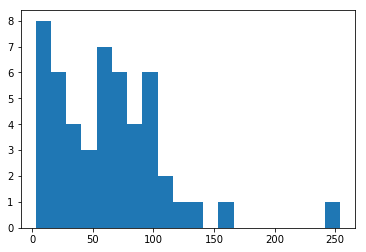

In [166]:
plt.hist([len(list_of_vectors[i]) for i in range(50)], bins=20)
plt.show()

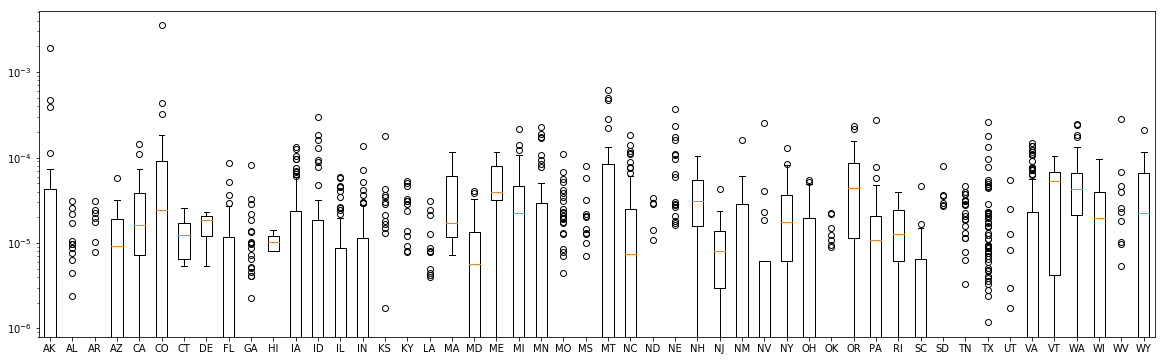

In [90]:
plt.figure(figsize=(20,6))
plt.boxplot(list_of_vectors)
plt.yscale('log')
plt.xticks([x*1  for x in range(1,51)], list_of_groups)
plt.show()

In [105]:
brews_per_cap['brews_per_cap'].mean().sort_values()

Stab
OK    0.000001
AR    0.000002
GA    0.000002
LA    0.000002
ND    0.000002
AL    0.000002
KY    0.000003
MS    0.000004
UT    0.000004
SD    0.000004
SC    0.000004
KS    0.000004
TN    0.000005
MO    0.000006
TX    0.000006
IL    0.000006
FL    0.000008
IN    0.000009
HI    0.000009
WV    0.000010
NJ    0.000010
MD    0.000011
OH    0.000011
AZ    0.000013
CT    0.000013
DE    0.000016
IA    0.000016
RI    0.000016
NE    0.000017
PA    0.000017
NM    0.000017
VA    0.000018
DC    0.000019
NV    0.000020
NC    0.000021
MN    0.000023
NY    0.000024
WI    0.000025
CA    0.000027
ID    0.000027
MI    0.000033
NH    0.000037
MA    0.000037
WY    0.000038
VT    0.000043
ME    0.000052
WA    0.000058
OR    0.000062
MT    0.000063
CO    0.000112
AK    0.000113
Name: brews_per_cap, dtype: float64

In [172]:
# Standard Federal Regions

# state_regions = {1:['CT', 'ME', 'MA', 'NH', 'RI', 'VT'], 
#                  2:['NY', 'NJ'], 
#                  3:['DE', 'MD', 'PA', 'VA', 'WV'], 
#                  4:['AL', 'FL', 'GA', 'KY', 'MS', 'NC', 'SC', 'TN'], 
#                  5:['IL', 'IN', 'MI', 'MN', 'OH', 'WI'], 
#                  6:['AR', 'LA', 'NM', 'OK', 'TX'], 
#                  7:['IA', 'KS', 'MO', 'NE'], 
#                  8:['CO', 'MT', 'ND', 'SD', 'UT', 'WY'], 
#                  9:['AZ', 'CA', 'HI', 'NV'], 
#                  10:['AK', 'ID', 'OR', 'WA']} 

state_regions = {1:['AK', 'CA', 'OR', 'WA','HI'], 
                 2:['NV', 'UT', 'ID', 'MT', 'WY', 'CO'], 
                 3:['AZ', 'NM', 'TX', 'OK'], 
                 4:['KS', 'NE', 'SD', 'ND', 'MN', 'IA', 'MO', 'IL', 'WI', 'IN', 'MI', 'OH'], 
                 5:['AR', 'LA', 'MS', 'AL', 'GA', 'SC', 'NC', 'TN', 'KY', 'WV', 'VA', 'FL'], 
                 6:['ME', 'NH', 'NJ', 'VT', 'MA', 'CT', 'RI', 'NY', 'PA', 'MD', 'DE'], } 

i=0
for key in state_regions:
    i+=len(state_regions[key])
print(i)

50


In [181]:
color_list = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33']
reversed_dict={}
state_color_dict={}
for key in state_regions:
    for state in state_regions[key]:
        reversed_dict[state]=color_list[key-1]

list_of_colors = []
for state in brews_per_cap['brews_per_cap'].mean().sort_values().drop('DC',axis=0).index:
    try:
        list_of_colors.append(reversed_dict[state])
    except:
        list_of_colors.append('gray')

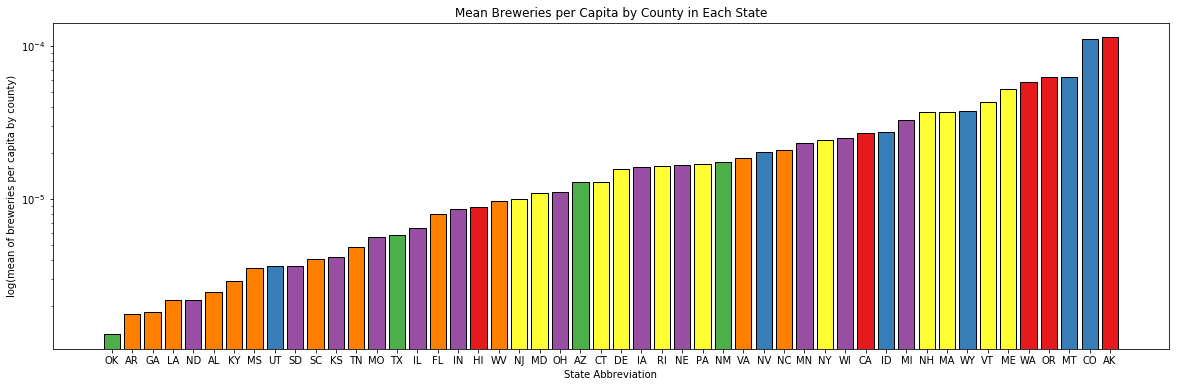

In [182]:
import numpy as np
plt.figure(figsize=(20,6))
plt.bar(brews_per_cap['brews_per_cap'].mean().sort_values().drop('DC',axis=0).index,brews_per_cap['brews_per_cap'].mean().sort_values().drop('DC',axis=0),color=list_of_colors,edgecolor ='black')
plt.yscale('log')
plt.ylabel('log(mean of breweries per capita by county)')
plt.xlabel('State Abbreviation')
plt.title('Mean Breweries per Capita by County in Each State')
plt.show()

# Prediction scaled to breweries

In [242]:
county_brews_existing = pd.read_csv('../Shapefile_Playground/countyID_nBrew.csv').set_index('GEOID').drop('Unnamed: 0',axis=1)

In [280]:
county_names = pd.read_csv('County_Lookup.csv', encoding='latin1', header=0, low_memory=False)

county_names=county_names[county_names['2015 GEOID'].notnull()]

county_names['2015 GEOID'].astype(int, inplace=True)

county_names.set_index('2015 GEOID', inplace=True)

county_names = county_names['2015 Geography Name']

In [243]:
county_brews_existing = county_brews_existing.join(predictions)

In [244]:
county_brews_existing.shape

(3142, 3)

In [245]:
county_brews_existing = county_brews_existing[county_brews_existing['1']>0.8]

In [246]:
county_brews_existing.shape

(277, 3)

In [247]:
county_brews_existing['pred_ratio']=county_brews_existing['1']/county_brews_existing['n_brewery']

In [248]:
high_value_counties = county_brews_existing[county_brews_existing['pred_ratio'] != np.inf]

In [249]:
high_value_counties = high_value_counties[high_value_counties['pred_ratio'].notnull()]

(array([127.,  80.,  29.,  25.,   6.,   5.,   0.,   0.,   0.,   5.]),
 array([0.00617704, 0.09510453, 0.18403201, 0.2729595 , 0.36188699,
        0.45081447, 0.53974196, 0.62866944, 0.71759693, 0.80652441,
        0.8954519 ]),
 <a list of 10 Patch objects>)

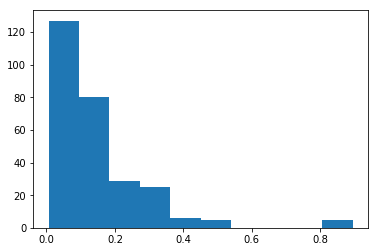

In [250]:
plt.hist(high_value_counties['pred_ratio'])

In [303]:
high_value_counties['pred_ratio'].sort_values()[-5:][::-1].index

Int64Index([39155, 42069, 9005, 34035, 12083], dtype='int64', name='GEOID')

In [305]:
county_brews_existing.loc[[39155, 42069, 9005, 34035, 12083]]

n_brewery         0         1  pred_ratio
GEOID                                           
39155          1  0.104548  0.895452    0.895452
42069          1  0.124642  0.875358    0.875358
9005           1  0.149537  0.850463    0.850463
34035          1  0.165358  0.834642    0.834642
12083          1  0.166941  0.833059    0.833059

In [300]:
county_names[high_value_counties['pred_ratio'].sort_values()[-5:][::-1].index]

GEOID
39155              Trumbull County, Ohio
42069    Lackawanna County, Pennsylvania
9005      Litchfield County, Connecticut
34035        Somerset County, New Jersey
12083             Marion County, Florida
Name: 2015 Geography Name, dtype: object

In [252]:
import math

colorscale = branca.colormap.LinearColormap(colors=['blue','gray', 'red'], index=[0,.4,1],vmin=0,vmax=1)
brew_series = high_value_counties['pred_ratio']
brew_series_nonzero = brew_series[brew_series != 0]


def style_function(feature):
    brews = brew_series_nonzero.get(int(feature['id'][-5:]))
    return {
        'fillOpacity': 0.7,
        'weight': 0,
        'fillColor': 'None' if brews is None else colorscale(brews)
    }


m = folium.Map(
    location=[48, -102],
    tiles='cartodbpositron',
    zoom_start=3
)

folium.TopoJson(
    open(county_geo),
    'objects.us_counties_20m',
    style_function=style_function
).add_to(m)

m.save(outfile='Predictions.html')
m

In [322]:
brewery_founding_dates = pd.read_csv('../BreweryFoundingDate.csv', encoding='latin1', header=0, low_memory=False)

In [358]:
brewery_founding_dates.columns

Index(['Company', 'Founded Date'], dtype='object')

In [360]:
brewery_founding_dates[brewery_founding_dates['Company']=='Clubhouse Brewing Company Ltd']

Company Founded Date
6220  Clubhouse Brewing Company Ltd   11/24/2017

# Prediction for counties with no breweries

In [306]:
empty_counties = county_brews_existing[county_brews_existing['n_brewery'] == 0]

In [310]:
empty_county_predictions = predictions.drop(county_brews_existing.index, axis=0)

In [312]:
empty_county_predictions['1']

GEOID
46045    0.101362
31143    0.101362
20131    0.101362
31175    0.101438
8095     0.102015
31167    0.102015
31121    0.102015
31051    0.102015
31099    0.102015
31081    0.102015
19183    0.104252
38011    0.104310
19123    0.105495
19143    0.106067
28015    0.106233
27161    0.106602
40149    0.107186
20147    0.107202
19093    0.107242
31089    0.107347
46091    0.107561
17169    0.107698
19129    0.107782
38023    0.107912
20031    0.107927
27063    0.108111
27129    0.108111
20143    0.108111
20047    0.108111
31059    0.108111
           ...   
42133    0.740393
37171    0.743497
22051    0.747717
34039    0.753503
18163    0.758596
26055    0.758815
1003     0.759905
39089    0.760793
51087    0.761653
46099    0.764190
44009    0.764737
42125    0.765007
27163    0.765772
54039    0.768463
6095     0.768519
53029    0.768990
55139    0.771542
45091    0.772992
17163    0.773432
36069    0.775206
23031    0.779060
12069    0.782529
23019    0.782650
1101     0.782844
1308

In [315]:
import math

colorscale = branca.colormap.LinearColormap(colors=['blue','gray', 'red'], index=[0,.4,0.8],vmin=0,vmax=1)
brew_series = empty_county_predictions['1']
brew_series_nonzero = brew_series[brew_series != 0]


def style_function(feature):
    brews = brew_series_nonzero.get(int(feature['id'][-5:]))
    return {
        'fillOpacity': 0.7,
        'weight': 0,
        'fillColor': 'None' if brews is None else colorscale(brews)
    }


m = folium.Map(
    location=[48, -102],
    tiles='cartodbpositron',
    zoom_start=3
)

folium.TopoJson(
    open(county_geo),
    'objects.us_counties_20m',
    style_function=style_function
).add_to(m)

m.save(outfile='Empty_county_Predictions.html')
m

In [371]:
obdb = pd.read_csv('../Deprecated or Old/processed_has_coord.csv')

In [372]:
obdb.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'brewery_type', 'city',
       'id', 'latitude', 'longitude', 'name', 'phone', 'postal_code', 'state',
       'street'],
      dtype='object')

In [379]:
obdb[obdb['city'] == 'Carbondale']

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1 brewery_type        city    id  \
1779         663          1841             NaN      brewpub  Carbondale  1289   
2130        1014          5879             NaN      brewpub  Carbondale  6153   

       latitude   longitude                   name         phone postal_code  \
1779  39.400607 -107.213491  Carbondale Beer Works           NaN  81623-1934   
2130  41.573825  -75.500010              Iron Hart  5.702803e+09  18407-1904   

             state          street  
1779      Colorado     647 Main St  
2130  Pennsylvania  49 N Church St